# Shlukování

## Zdroj dat
  * Zdrojem dat je soubor `CC GENERAL.csv` (originál zde: https://www.kaggle.com/datasets/arjunbhasin2013/ccdata).

# Zpracování

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_theme(style='darkgrid')

%matplotlib inline

## Explorační analýza dat
V této sekci se zaměřím na základní analýzu datasetu.

### Popis příznaků (dokumentace)

- `CUST_ID` : identifikace držitele
- `BALANCE` : zůstatek na účtu
- `BALANCE_FREQUENCY` : frekvence změny zůstatku (0 a 1)
- `PURCHASES` : částka provedených nákupů
- `ONEOFF_PURCHASES` : největší jendnorázový nákup 
- `INSTALLMENTSPURCHASES`: částka nákupů na splátky
- `CASH_ADVANCE` : předem poskytnutá hotovost
- `PURCHASES_FREQUENCY` : frekvence nákupů (0 až 1)
- `ONEOFF_PURCHASES_FREQUENCY` : fekvence jednorázových nákupů (0 až 1)
- `PURCHASES_INSTALLMENTS_FREQUENCY` : fekvence nákupů na splátky (0 až 1)
- `CASHADVANCE_FREQUENCY` : frekvence nákupů v hotovosti předem
- `CASHADVANCE_TRX` : počet transakcí provedených předem s hotovostí
- `PURCHASES_TRX` : počet nákupů
- `CREDIT_LIMIT` : limit kreditní karty
- `PAYMENTS` : celková částka zaplacená uživatelem
- `MINIMUM_PAYMENTS` : minimální částka zaplacená uživatelem
- `PRC_FULL_PAYMENT` : procenta celé platby zaplacené uživatelem
- `TENURE` : doba vlastnictví kreditní karty

In [2]:
# load csv and replace empty values with `np.nan`
data = pd.read_csv('CC GENERAL.csv').fillna(np.nan)

### Základní info
Zde zobrazím info o počtu řádků, počtu příznaků, jejich typy a základní statistické hodnoty.

In [3]:
display(data.shape)
display(data.head(3))
display(data.info())

(8950, 18)

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.0,0.083333,0.00,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.0,0.000000,0.25,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.0,0.000000,0.00,0,12,7500.0,622.066742,627.284787,0.000000,12


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8950 non-null   object 
 1   BALANCE                           8950 non-null   float64
 2   BALANCE_FREQUENCY                 8950 non-null   float64
 3   PURCHASES                         8950 non-null   float64
 4   ONEOFF_PURCHASES                  8950 non-null   float64
 5   INSTALLMENTS_PURCHASES            8950 non-null   float64
 6   CASH_ADVANCE                      8950 non-null   float64
 7   PURCHASES_FREQUENCY               8950 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 11  CASH_ADVANCE_TRX                  8950 non-null   int64  
 12  PURCHA

None

Dataset obsahuje `18` příznaků. Z toho je `CUST_ID` pouze identifikátorem. Tento příznak tedy odstraním.

Dále obsahuje `8950` záznamů. Všechny jsou numerické.

In [4]:
data.drop(['CUST_ID'], axis=1, inplace=True)

### Střední hodnota
Pro každý příznak si zobrazím střední hodnotu. Na základě toho budu data dále zpracovávat.

In [5]:
data_mean = data.describe().loc['mean']

display(data_mean)
print('MinMax diff:', np.max(data_mean) - np.min(data_mean))

BALANCE                             1564.474828
BALANCE_FREQUENCY                      0.877271
PURCHASES                           1003.204834
ONEOFF_PURCHASES                     592.437371
INSTALLMENTS_PURCHASES               411.067645
CASH_ADVANCE                         978.871112
PURCHASES_FREQUENCY                    0.490351
ONEOFF_PURCHASES_FREQUENCY             0.202458
PURCHASES_INSTALLMENTS_FREQUENCY       0.364437
CASH_ADVANCE_FREQUENCY                 0.135144
CASH_ADVANCE_TRX                       3.248827
PURCHASES_TRX                         14.709832
CREDIT_LIMIT                        4494.449450
PAYMENTS                            1733.143852
MINIMUM_PAYMENTS                     864.206542
PRC_FULL_PAYMENT                       0.153715
TENURE                                11.517318
Name: mean, dtype: float64

MinMax diff: 4494.314306164286


Můžeme vidět, že rozdíl mezi nejmenší a největší střední hodnotou je přibližně `4494.31`.

To znamená, že by zde mohla při predikci pomoct standardizace příznaků.

### Chybějící hodnoty
Zde vypíšu příznaky, které obsahují chybějící hodnoty a jejich počet v poměru ke všem datům.


In [6]:
# get features with missing values
missing_features = data.columns[data.isnull().any()]
 
# fill array with tuples containg name and missing values count
missing_pairs = [(f, data[f].isnull().sum()) for f in missing_features]

print("\nMissing:")
for feature, null_cnt in sorted(missing_pairs, key=lambda x: x[1], reverse=True):
    print(f"{feature.strip(): <20}: {null_cnt: < 5} : {null_cnt / data.shape[0] * 100:.5f}%")


Missing:
MINIMUM_PAYMENTS    :  313  : 3.49721%
CREDIT_LIMIT        :  1    : 0.01117%


Chybějící hodnoty jsou pouze u příznaků `MINIMUM_PAYMENTS` a `CREDIT_LIMIT`. Tyto hodnoty v předzpracování nahradím mediánem.

### Korelace příznaků
Zobrazím si matici lineárních korelačních koeficientů a budu diskutovat závislost příznaků.

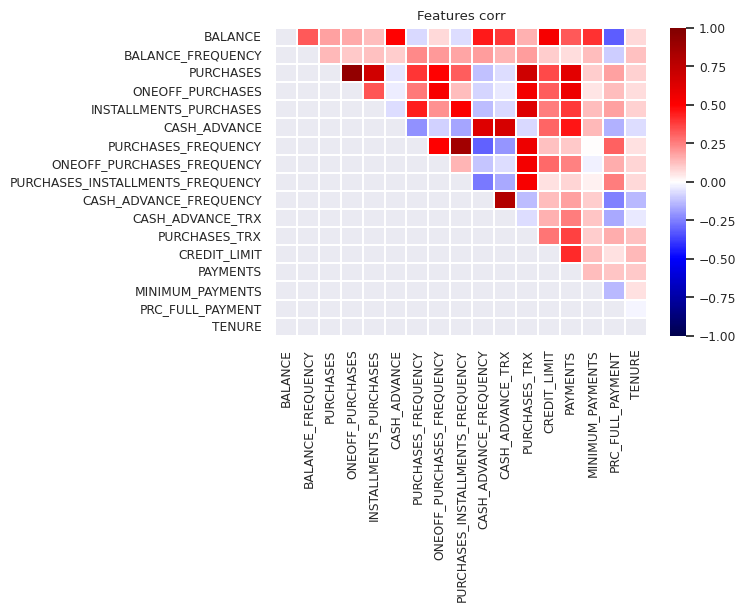

In [7]:
corr = data.corr()
mask = np.tril(np.ones_like(corr))

plt.figure(figsize=(6, 4))
sns.set(font_scale=0.8)
sns.heatmap(corr, cmap='seismic', center=0, linewidths=.1, mask=mask, vmin=-1, vmax=1)
plt.title('Features corr')
plt.show()

Z korelační matice můžeme pozorovat, že:
- `BALANCE` kladně koreluje s `PURCHASES_FREQ.` a `CREDIT_LIMIT`. To znamená, že osoby s větším obnosem peněz více nakupují a mají větší limit na kartě.
- `PURCHASES` kladně koreluje s příznaky týkající se právě nákupů a plateb. Nejvíce s příznakem `ONEOFF_PURCHASES`.

### Rozdělení příznaků
Zobrazím ke každému příznaku jeho distribuci hodnot pomocí histogramu.

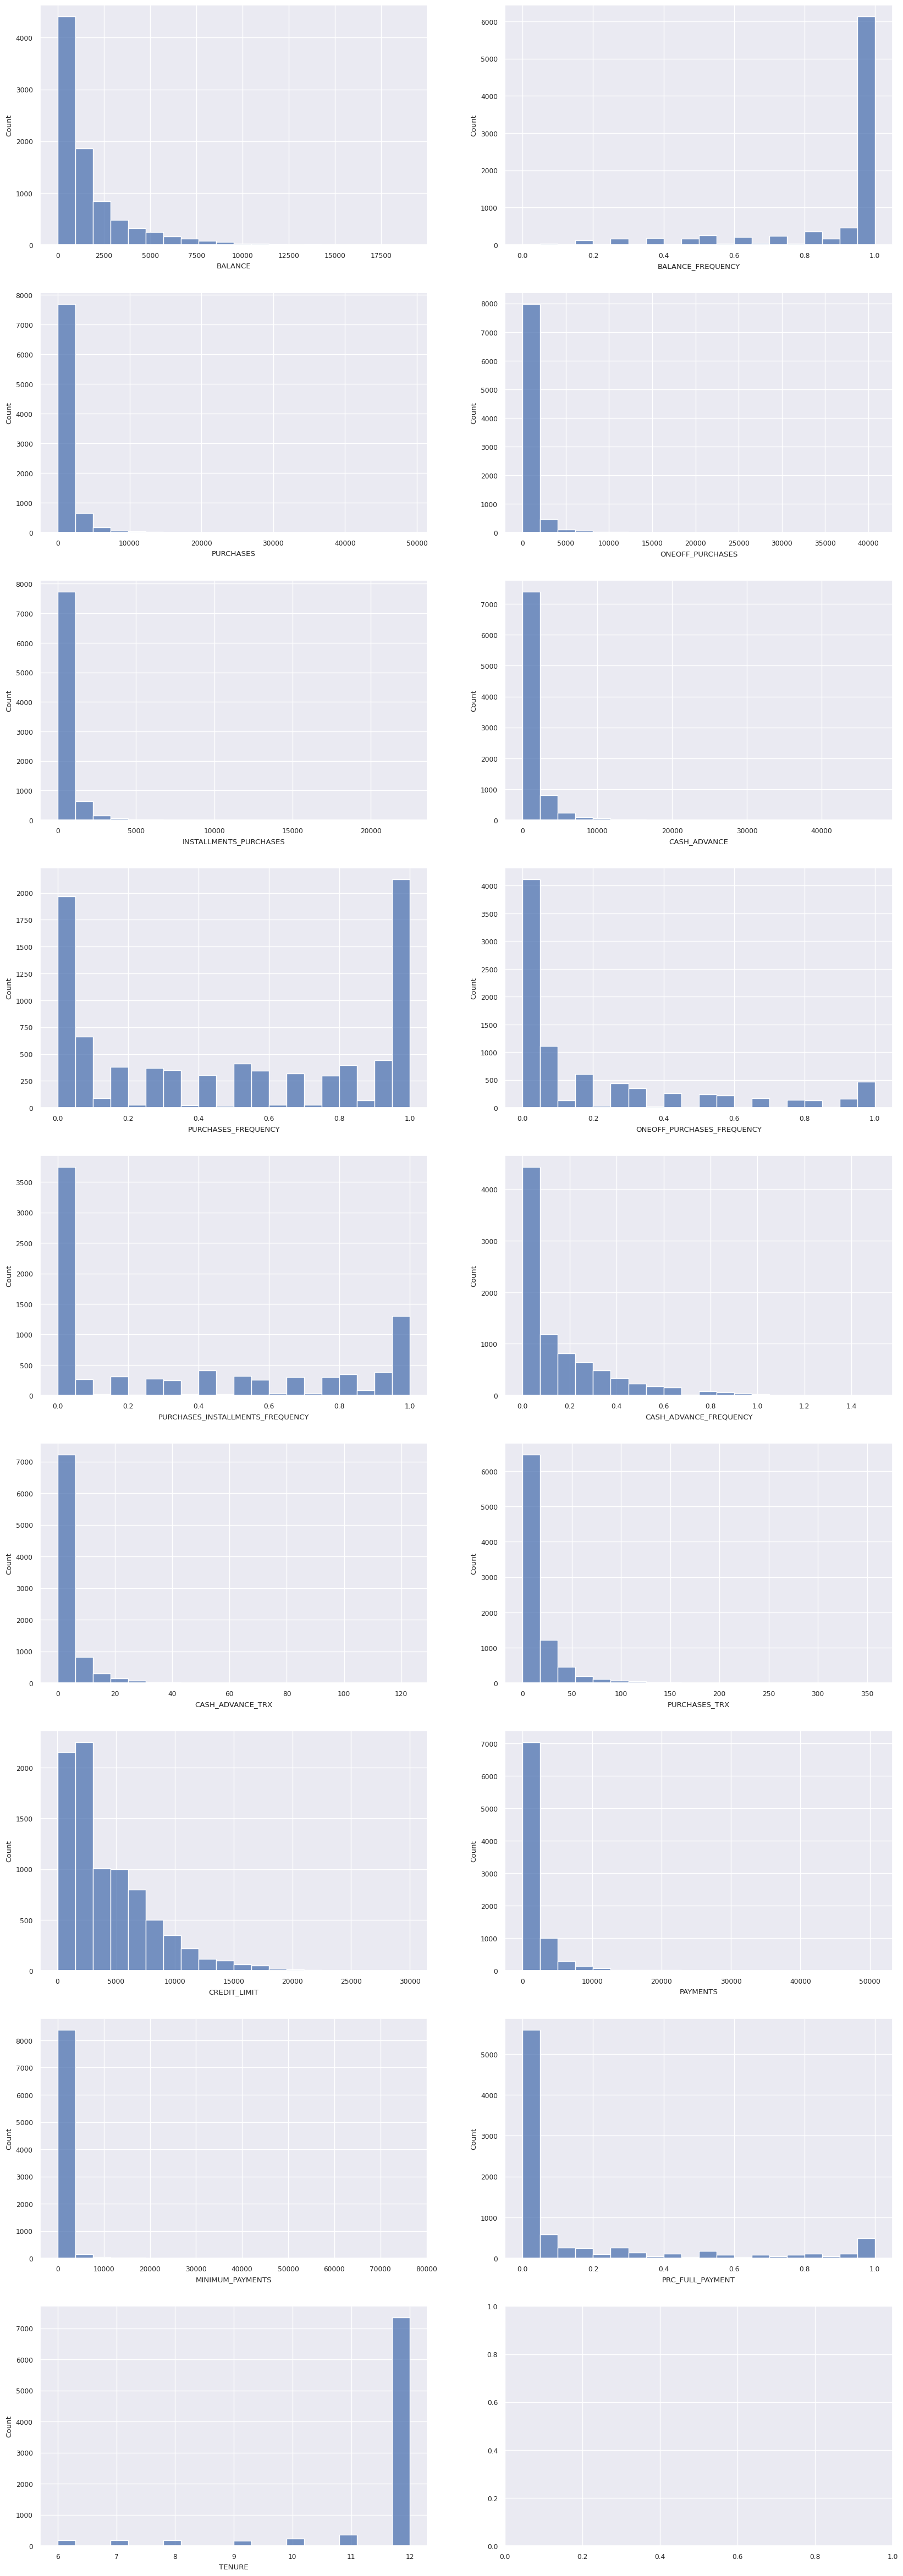

In [8]:
fig, ax = plt.subplots(9, 2, figsize=(20, 60))

data_notnull = data.dropna()

for feature, subplot in zip(list(data.columns), ax.flatten()):
    sns.histplot(data=data_notnull[feature], ax=subplot, bins=20)

Na grafech můžeme pozorovat, že:
- `BALANCE`, `PURCHASES`, `CASH_ADVANCE`, `CREDIT_LIMIT`, `PAYMENTS` a související příznaky se pravděpodobně řídí **expon. rozdělením**
- `PURCHASES_FREQ.`, `PURCH._INSTALLMENTS_FREQ.`, `MINIMUM_PAYMENTS`, `TENURE` se neřídí žádným ze známých rozdělení

### Odlehlé hodnoty
Pro každý příznak ještě vykreslím box plot pro zjištění odlehlých hodnot.

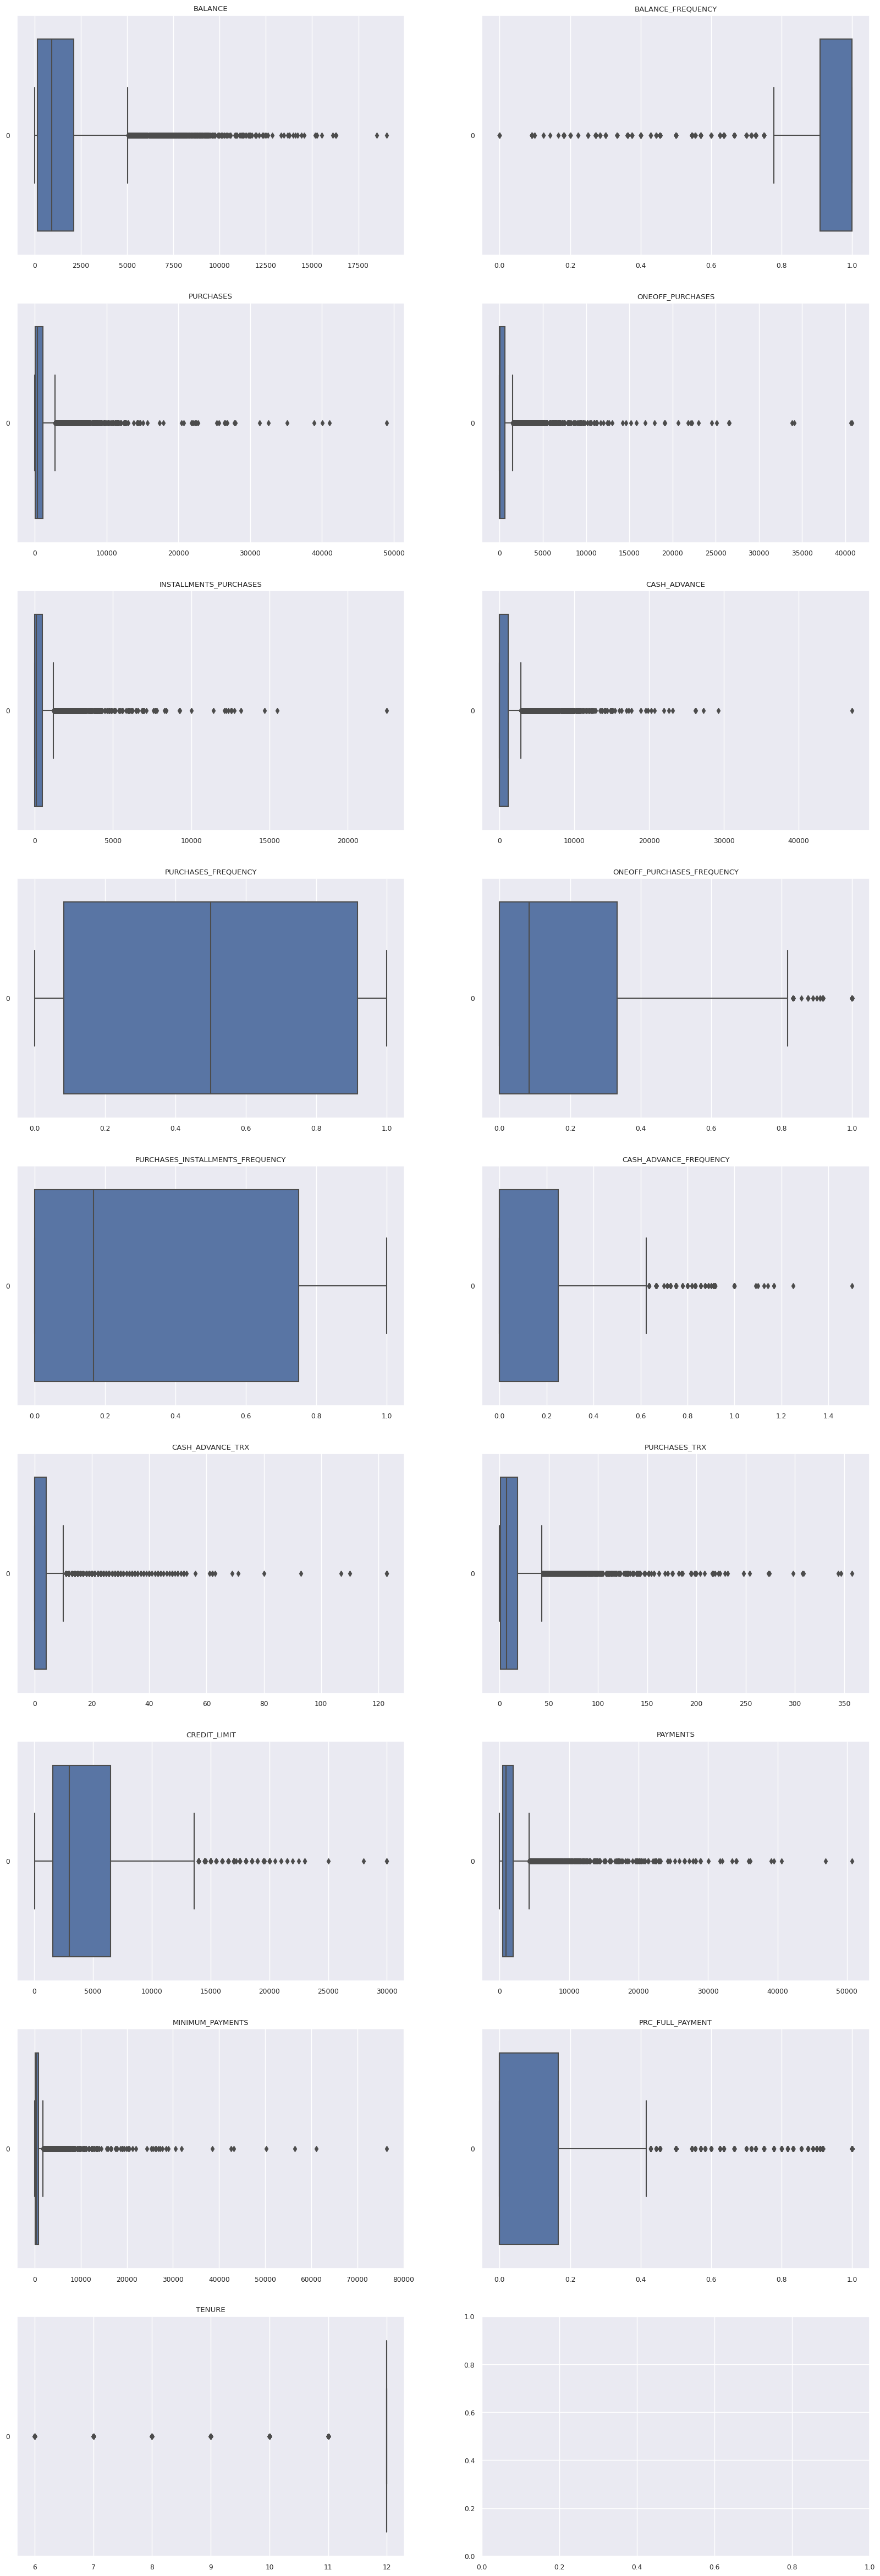

In [9]:
fig, ax = plt.subplots(9, 2, figsize=(20, 60))

data_notnull = data.dropna()

for feature, subplot in zip(list(data.columns), ax.flatten()):
    sns.boxplot(data_notnull[feature], ax=subplot, orient='h').set_title(feature)

Příznaky popisující nějakou frekvenci nákupů a plateb mají spíše menší počet odlehlých hodnot z důvodu hodnot na itervalu `[0, 1]`.

Příznaky popisující nákupy se drží spíše u `0` a vyšší hodnota je spíše odlehlá.

Limit kreditních karet se pohybuje spíše na intervalu `[0, 7000]`. Vyšší limity se spíše neobjevují.

Minimální platba kartou je většinou `0`.

## Zpracování dat
V této sekci zpracuji data na základě předchozích poznatků.

In [10]:
X = data.copy()

### Nahrazení null hodnot
Null hodnoty u příznaků `MINIMUM_PAYMENTS` a `CREDIT_LIMIT` nahradím mediánem.

In [11]:
for feature in ['MINIMUM_PAYMENTS', 'CREDIT_LIMIT']:
    X[feature].fillna(X[feature].median(), inplace=True)

print('Null values cnt:', X.isna().sum().sum())

Null values cnt: 0


### Konverze na np.ndarray
Nejdříve převedu všechny příznaky na typ *float* a následně na `np.ndarray`.

In [12]:
X = X.astype('float64').to_numpy()

## Výběr modelu
Zde se budu snažit na základě různých metrik najít optimální model pro rozdělení dat.

Taktéž zadefinuji náhodný seed pro následné deterministické trénování modelů.

In [13]:
random_seed = 420

### Vlastní model kMeans
Model se budu snažit navrhnout dle standardů sklearn tak, aby obsahovat metody jako `fit`, `predict` a `score`. 

V případě `fit` se najde zvolený počet centroidů. `predict` bude následně už přiřazovat data k centroidům.

Popis modelu:
- Náhodně se zvolí k centroidů
- V každé iteraci se každý bod přiřadí do shluku
- Na základě průměru pozic bodů ve shluku se vypočítá nový centroid
- Iterujeme dokud se centroidy pohybují

In [14]:
from sklearn.metrics import silhouette_score

def distance(x, y, p_norm: int) -> float:
    """ Calculates p-norm distance between two vectors (default: Euclidian)"""
    return (np.sum(np.abs(x - y)) ** p_norm) ** (1 / p_norm)

class kMeans():
    """ kMeans clustering model """

    centroids = np.array([])
    labels = np.array([])

    def __init__(self, 
        n_clusters: int = 8, max_iter: int = 100, 
        p_norm: int = 2, random_state: int = None):

        self.k = n_clusters
        self.max_iter = max_iter
        self.p_norm = p_norm
        self.random_state = random_state

    def init_centroids(self, X: np.ndarray):
        """ Select random k rows and make them centroids """

        if self.random_state is not None:
            np.random.seed(self.random_state)

        self.centroids = X[np.random.choice(X.shape[0], self.k, replace=False)]

    def assign_to_cluster(self, X: np.ndarray) -> np.ndarray:
        """ Assing each of training data to centroid based on distance """
        
        assigned_clusters = np.zeros(X.shape[0], dtype='int')

        # assing cluster id for every row based on minimal distance
        for i, x in enumerate(X):

            d = [distance(x, c, self.p_norm) for c in self.centroids]
            assigned_clusters[i] = np.argmin(d)

        return assigned_clusters

    def calibrate_centroids(self, X: np.ndarray, assignments) -> bool:
        """ 
        Move centroids location based on mean of elements and
        return equality array of new and current centroids
        """

        new_centroids = np.zeros_like(self.centroids)

        # calculate k new cetroids
        for i in range(self.k):
            new_centroids[i] = X[assignments == i].mean(axis=0)

        # np.array of true / false
        equals = (self.centroids == new_centroids)
        self.centroids = new_centroids

        return equals

    def fit(self, X) -> tuple:
        """ Train model on given data """

        self.init_centroids(X)
        
        for _ in range(self.max_iter):
            
            self.labels = self.assign_to_cluster(X)
            if self.calibrate_centroids(X, self.labels).all():
                break

        return self.labels, self.centroids

    def predict(self, Y: np.ndarray) -> np.ndarray:
        """ Predict new data assignments on based on precomputed centroids """

        return self.assign_to_cluster(Y)

    def score(self, Y: np.ndarray) -> float:
        """ Return silhouette score for given data """
        return silhouette_score(Y, self.labels)


#### Ladění a normalizace
V následující buňce se pokusím pro normalizovaná data vyladit počet shluků podle jejich **silhouette score**.

Budu tedy iterovat přes možnosti `[None, StandardScaler, MinMaxScaler, Normalizer, PCA]` a výsledky uložím do slovníku.

In [15]:
from sklearn.model_selection import ParameterGrid
from sklearn.preprocessing import StandardScaler, MinMaxScaler, Normalizer
from sklearn.decomposition import PCA

# set scalers
scaler_scores = { 'None' : [], 'Standard' : [], 'MinMax' : [], 'Norm' : [], 'PCA' : [] }
scalers = [None, StandardScaler(), MinMaxScaler(), Normalizer(), PCA()]

# try each scaler and save its silhouette score
for key, scaler in zip(scaler_scores.keys(), scalers):

    # use scaler if not None
    X_tmp = X if scaler is None else scaler.fit_transform(X)

    # setup param grid
    param_comb = ParameterGrid({ 'n_clusters' : np.arange(2, 5)})
    scores = []

    # get silhouette score for each number of clusters
    for params in param_comb:
        custom_kmeans = kMeans(**params, random_state=random_seed)

        labels, _ = custom_kmeans.fit(X_tmp)
        scores.append(silhouette_score(X_tmp, labels))

    scaler_scores[key] = scores

Naměřené hodnoty vykreslím pomocí heatmapy.

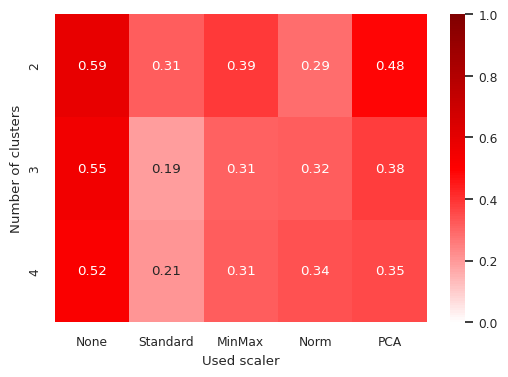

In [16]:
# create pandas dataframe and match index to number of clusters
df = pd.DataFrame.from_dict(scaler_scores)
df.index += 2

# plot heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(df, cmap='seismic', center=0, annot=True, vmin=0, vmax=1)
plt.ylabel('Number of clusters')
plt.xlabel('Used scaler')
plt.show()

Nejlepších výsledků dosahujeme bez normalizace a škálování dat pro `2 shluky`. S vyladěnými parametry tedy opět natrénuji vlastní model a vykreslím průběh trénování.

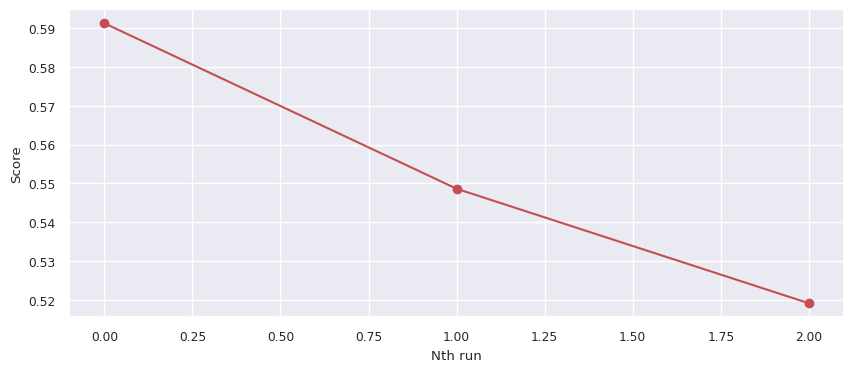

{'n_clusters': 2}

Silhouette score: 0.59124


In [17]:
# plot score for each iteration without scaler
plt.figure(figsize=(10, 4))
plt.plot(scaler_scores['None'], 'ro-')
plt.xlabel('Nth run')
plt.ylabel('Score')
plt.show()

# get best params
best_params = param_comb[np.argmax(scaler_scores['None'])]
display(best_params)

opt_custom_kmeans = kMeans(**best_params)
opt_custom_kmeans.fit(X)

print('Silhouette score:', round(silhouette_score(X, opt_custom_kmeans.labels), 5))

Nyní ještě vykreslím 2D repezentaci rozdělení dat do shluků s jejich centroidy.

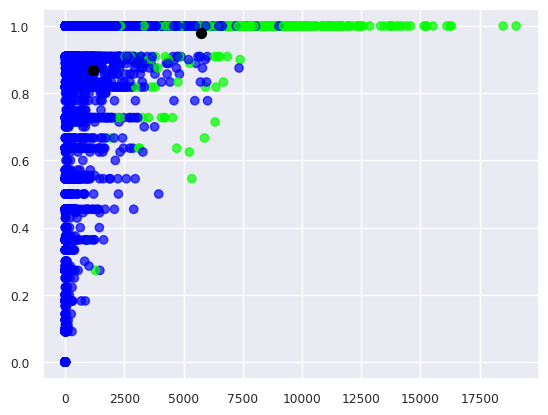

In [18]:
plt.scatter(X[:,0], X[:,1], c=opt_custom_kmeans.labels, cmap='brg', alpha=0.7)
plt.scatter(
    opt_custom_kmeans.centroids[:,0], 
    opt_custom_kmeans.centroids[:,1], c='black', s=50)
plt.show()

K výslednému vyhodnocení a porovnání se dostanu v sekci `Evaluace`.

### Sklearn kMeans
Knihovna sklearn obsahuje vlastní implementaci algoritmu kMeans. Proto se opět pokusím o nalezení optimální normalizace a hyperparametrů.

Optimalizaci provedu opět pomocí dvou cyklů.

In [19]:
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

scaler_scores = { 'None' : [], 'Standard' : [], 'MinMax' : [], 'Norm' : [], 'PCA': [] }
scalers = [None, StandardScaler(), MinMaxScaler(), Normalizer(), PCA()]

for key, scaler in zip(scaler_scores.keys(), scalers):

    X_tmp = X if scaler is None else scaler.fit_transform(X)

    param_comb = ParameterGrid({
        'n_clusters' : np.arange(2, 4),
        'init' : ['k-means++'],
        'algorithm' : ['lloyd'],
        'tol' : [0],
        'max_iter' : [1000]
    })

    scores, n_iters = [], []

    for params in param_comb:
        kmeans = KMeans(**params, random_state=random_seed)
        kmeans.fit(X_tmp)

        scores.append(silhouette_score(X_tmp, kmeans.labels_))
        n_iters.append(kmeans.n_iter_)

    scaler_scores[key] = scores
    

Opět pro každou normalizační techniku zobrazím její úspěšnost a na základě toho budu postupovat dál.

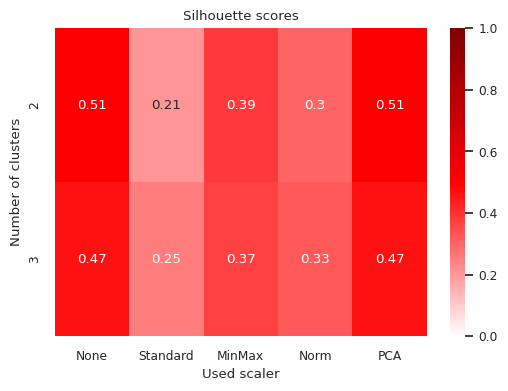

In [20]:
df = pd.DataFrame.from_dict(scaler_scores)
df.index += 2

# plot heatmap
plt.figure(figsize=(6, 4))
plt.title('Silhouette scores')
sns.heatmap(df, cmap='seismic', center=0, annot=True, vmin=0, vmax=1)
plt.ylabel('Number of clusters')
plt.xlabel('Used scaler')
plt.show()

Zde vidíme, že si model nejlépe vede bez normalizace dat a s redukcí dimenzionality pomocí `PCA`. Dál tedy budu postupovat s nenormalizovanými 

Zobrazím si tedy optimální parametry a taktéž průběh testování přes iterace bez normalizace.

{'tol': 0,
 'n_clusters': 2,
 'max_iter': 1000,
 'init': 'k-means++',
 'algorithm': 'lloyd'}

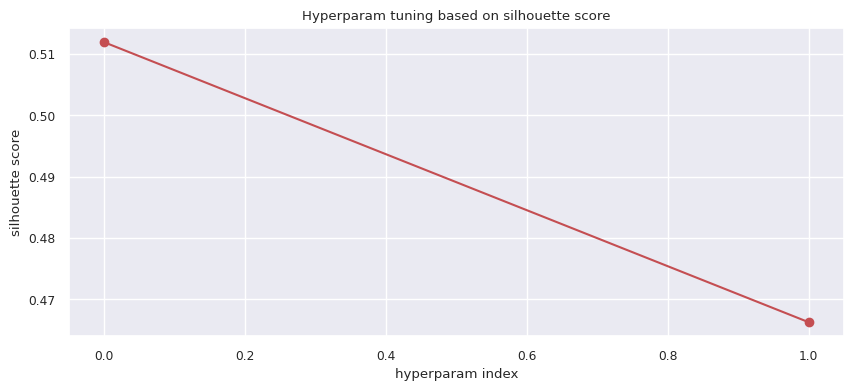

In [21]:
best_params = param_comb[np.argmax(scaler_scores['None'])]
display(best_params)

plt.figure(figsize=(10, 4))
plt.title('Hyperparam tuning based on silhouette score')
plt.plot(scaler_scores['None'],'ro-')
plt.xlabel('hyperparam index')
plt.ylabel('silhouette score')
plt.show()

Dle optimalizace je nejlepší počet shluků 2. Na modelu s nejlepšími parametry zkusím ještě vyladit počet shluků podle metody lokte.

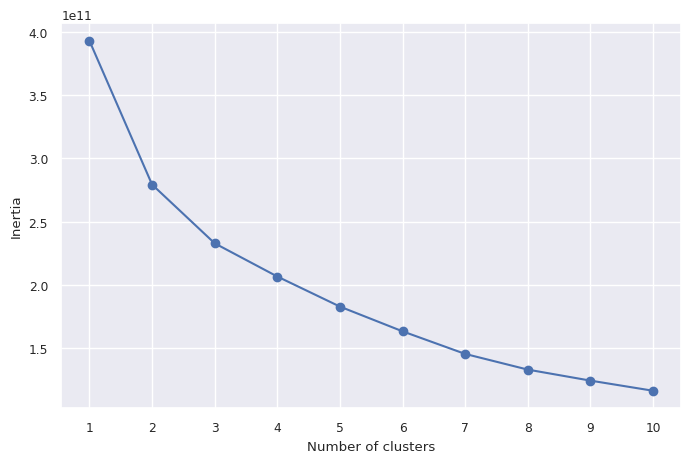

In [22]:
max_n_clusters = 10
ix, iy = np.zeros(max_n_clusters), np.zeros(max_n_clusters)

# optimal params from previous training
params = {
    'init' : 'k-means++',
    'algorithm' : 'lloyd',
    'random_state' : random_seed,
    'tol' : 0,
    'max_iter' : 1000
}

# get inetria for each k
for k in np.arange(max_n_clusters):
    kmeans = KMeans(n_clusters=k + 1, **params)
    kmeans.fit(X)

    iy[k] = kmeans.inertia_
    ix[k] = k + 1

# plot inertia developement
plt.figure(figsize=(8, 5))
plt.xlabel('Number of clusters')
plt.xticks(np.arange(1, 11))
plt.ylabel('Inertia')
plt.plot(ix, iy, 'o-')
plt.show()

Dle hodnot účelové funkce vidíme, že se `"loket"` bude nacházet buď ve 2 nebo 3 shlucích.

Proto ještě naposledy natrénuji model pro tyto hodnoty a podívám se na silhouette score.

In [23]:
# optimal params
params = {
    'init' : 'k-means++',
    'algorithm' : 'lloyd',
    'random_state' : random_seed,
    'tol' : 0,
    'max_iter' : 1000
}

# models with 2 and 3 clusters
opt_kmeans_two, opt_kmeans_three = [KMeans(n_clusters=k, **params) for k in [2, 3]]

opt_kmeans_two.fit(X)
opt_kmeans_three.fit(X)

print('2 clusters score:', round(silhouette_score(X, opt_kmeans_two.labels_), 5))
print('3 clusters score:', round(silhouette_score(X, opt_kmeans_three.labels_), 5))

2 clusters score: 0.51193
3 clusters score: 0.46629


Silhouette score vychází pro 2 shluky lépe.

Ještě vykreslím pro tyto dvě vyrianty jejich 2D reprezentaci přiřazení ke shlukům.

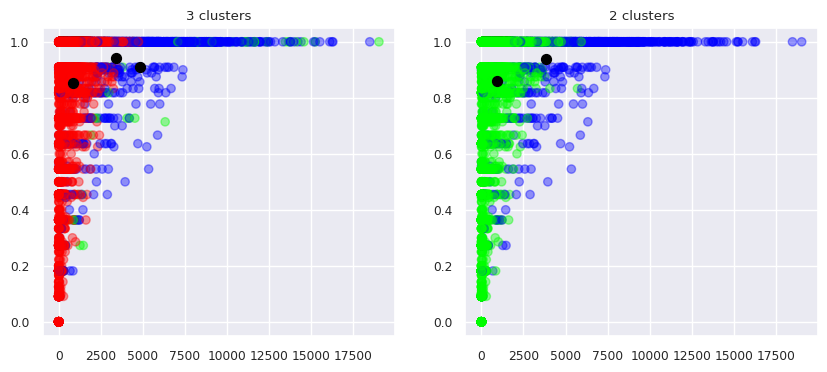

In [24]:
fig, ax = plt.subplots(1, 2, figsize=(10, 4))

# plot 3 sclusters
ax[0].set_title('3 clusters')
ax[0].scatter(X[:,0], X[:,1], c=opt_kmeans_three.labels_, cmap='brg', alpha=0.4)
ax[0].scatter(
    opt_kmeans_three.cluster_centers_[:,0], 
    opt_kmeans_three.cluster_centers_[:,1], c='black', s=50)

# plot 2 clusters
ax[1].set_title('2 clusters')
ax[1].scatter(X[:,0], X[:,1], c=opt_kmeans_two.labels_, cmap='brg', alpha=0.4)
ax[1].scatter(
    opt_kmeans_two.cluster_centers_[:,0], 
    opt_kmeans_two.cluster_centers_[:,1], c='black', s=50)

fig.show()

Model, který rozděluje množinu na 3 shluky vytvoří dva a třetí je očividně minoritou.

Po přihlédnutí k vlastní implementaci kMeans, která taktéž vybrala 2 shluky budu usuzovat, že 2 shluky jsou optimální rozdělení množiny.

### Porovnání kMeans s vlastní implementací
K porovnání použiju metriku silhouette score.

In [25]:
print('Custom kMeans score:', round(silhouette_score(X, opt_custom_kmeans.labels), 5))
print('Sklearn kMeans score:', round(silhouette_score(X, opt_kmeans_two.labels_), 5))

Custom kMeans score: 0.59124
Sklearn kMeans score: 0.51193


Na datasetu si podle skóre vedla lépe vlastní implementace.

To může znamenat tři věci:
- Vlastní implementace se na poskytnutých datech přetrénuje, takže menší skóre sklearn algoritmu nemusí nutně znamenat, že si vede hůř
- Druhá možnost je, že si vlastní implementace opravdu vede lépe
- Algoritmy z důvodu rozdílných prvotních centroidů přiřadí hodnotám jiné shluky.

Finální vyhodnocení opět nechám na sekci `Evaluace`.

### Aglomerativní hiearchické shlukování
Zde použiju algoritmus hiearchického shlukování ze cvičení s metodou.

Vytvořím matici spojení jednotlivých bodů.

In [26]:
from scipy.cluster.hierarchy import linkage

# create linkage matrix
Z_ward = linkage(X, method="ward", metric="euclidean")
Z_comp = linkage(X, method="complete", metric="euclidean")
Z_avg = linkage(X, method="average", metric="euclidean")
Z_single = linkage(X, method="single", metric="euclidean")

#### Dendrogram pro 10 největších shluků
Vykreslím dendrogram pro 10 největších shluků a následně se na jejich velikosti a vzdálenosti rozhodu pro optimální počet shluků.

In [27]:
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster.hierarchy import fcluster

n_clusters = 10
params = {
    'truncate_mode' : 'lastp',
    'p' : n_clusters,
    'leaf_font_size' : 8
}

#### Ward metoda
Dendogram s pomocí ward metody.

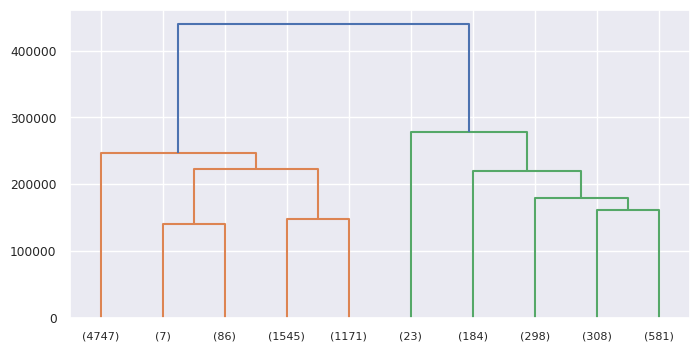

Silhouette score for 10 clusters: 0.32148


In [28]:
plt.figure(figsize=(8, 4))
dendrogram(Z_ward, **params)
plt.show()

# calculate silhouette score
ward_labels = fcluster(Z_ward, n_clusters, criterion="maxclust")
print(f'Silhouette score for {n_clusters} clusters:', 
    round(silhouette_score(X, ward_labels), 5))

#### Complete metoda
Dendrogram s pomocí complete metody.

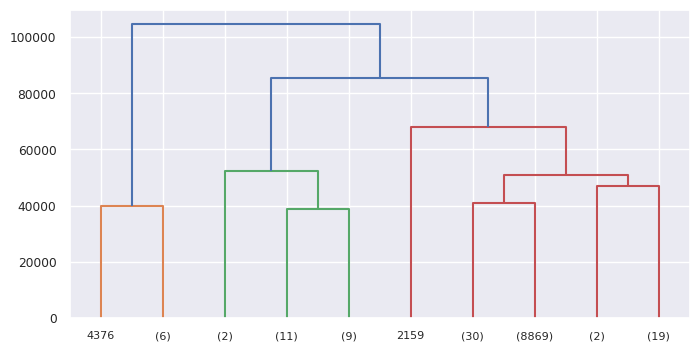

Silhouette score for 10 clusters: 0.70766


In [29]:
plt.figure(figsize=(8, 4))
dendrogram(Z_comp, **params)
plt.show()

# calculate silhouette score
comp_labels = fcluster(Z_comp, n_clusters, criterion="maxclust")
print(f'Silhouette score for {n_clusters} clusters:', 
    round(silhouette_score(X, comp_labels), 5))

#### Average metoda

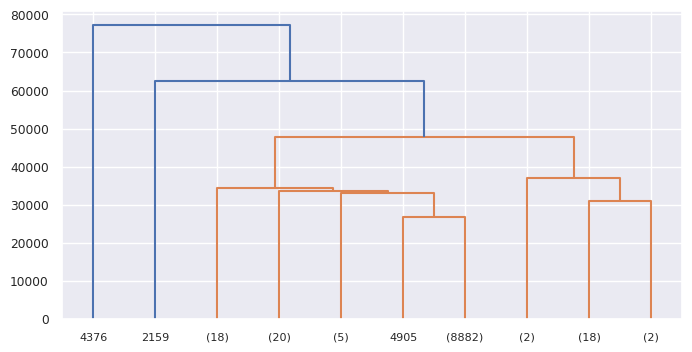

Silhouette score for 10 clusters: 0.73829


In [30]:
plt.figure(figsize=(8, 4))
dendrogram(Z_avg, **params)
plt.show()

# calculate silhouette score
avg_labels = fcluster(Z_avg, n_clusters, criterion="maxclust")
print(f'Silhouette score for {n_clusters} clusters:', 
    round(silhouette_score(X, avg_labels), 5))

#### Metoda single

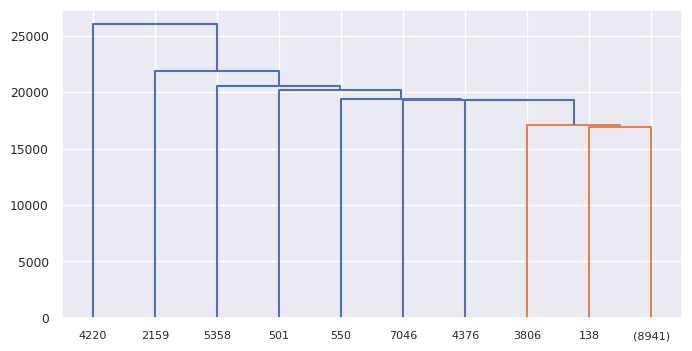

Silhouette score for 10 clusters: 0.81507


In [31]:
plt.figure(figsize=(8, 4))
dendrogram(Z_single, **params)
plt.show()

# calculate silhouette score
single_labels = fcluster(Z_single, n_clusters, criterion="maxclust")
print(f'Silhouette score for {n_clusters} clusters:', 
    round(silhouette_score(X, single_labels), 5))

Všechny typy linkování krom `ward` si vedli v silhouette score velmi dobře. Je to ale způsobeno tím, že když z nich vyberu 2 shluky, tak jeden z nich pokrývá většinu a druhý je spíše šum.

Proto nakonec vyberu model s typem linkování `ward`.

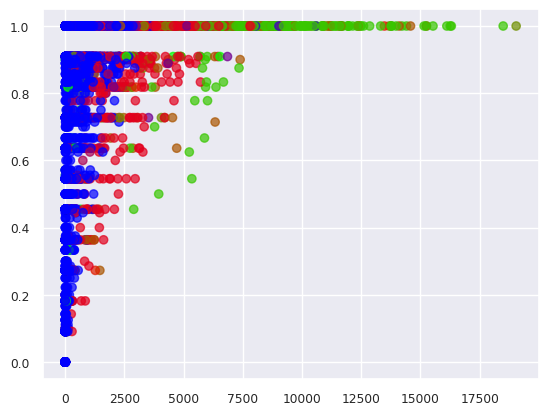

In [32]:
plt.scatter(X[:,0], X[:,1], c=ward_labels, cmap="brg", alpha=0.7)
plt.show()

Můžeme vidět, že podobně jako u kMeans se shluky tvoří jako pásma jdoucí od počátku. Ještě nám zbývá dendrogram ořiznout na požadovaný počet shluků.

#### Dendrogram se vzdáleností
Oříznutý dendrogram zobrazím pomocí funkce ze cvičení, ketrá vypisuje vzdálenosti mezi shluky.

In [33]:
def draw_dist_annot_dendrogram(*args, **kwargs):
    # pop arguments which are not expected by dendrogram function
    max_d = kwargs.pop("max_d", None)
    annot_above = kwargs.pop("annot_above", 0.0)
    
    if max_d and "color_threshold" not in kwargs:
        kwargs["color_threshold"] = max_d
    
    plt.title("Dendrogram hierarchického shlukování (oříznutý) se vzdáleností")
    plt.xlabel("index bodu (nebo velikost shluku)")
    plt.ylabel("vzdálenost")
    
    # create the dendrogram
    ddata = dendrogram(*args, **kwargs)

    for i, d, c in zip(ddata["icoord"], ddata["dcoord"], ddata["color_list"]):
        x = 0.5 * sum(i[1:3])
        y = d[1]
        # if the annotation value is above the threshold
        if y > annot_above:
            # plot a point at given x, y position
            plt.plot(x, y, "o", c=c)
            # show an annotation by the plotted point
            plt.annotate(
                "%.3g" % y, (x, y), xytext=(0, -5), textcoords="offset points", va="top", ha="center"
            )
    
    # show a horizontal line
    if max_d:
        plt.axhline(y=max_d, c="k")

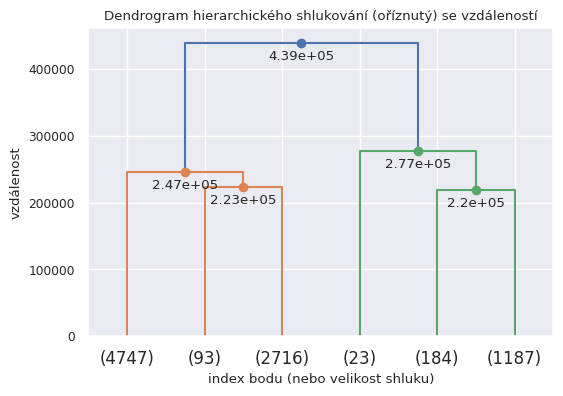

Silhouette score (2 clusters): 0.51837


In [34]:
plt.figure(figsize=(6, 4))
plt.title("Hiearchical clustering dendrogram")
plt.xlabel("Row index")
plt.ylabel("Distance")

draw_dist_annot_dendrogram(
    Z_ward, truncate_mode="lastp",
    p=6, leaf_font_size=12, annot_above=1.9)

plt.show()

labels = fcluster(Z_ward, 2, criterion="maxclust")
print('Silhouette score (2 clusters):', round(silhouette_score(X, labels), 5))

Vzhledem k dendrogramu mi dává smysl ořezat graf na 2 shluky, jelikož od sebe mají dostatečnou vzdálenost.

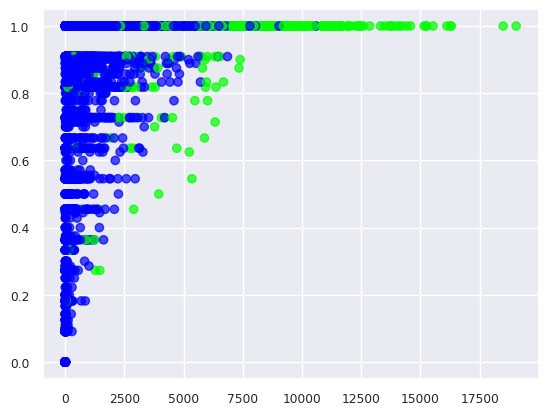

In [35]:
plt.scatter(X[:,0], X[:,1], c=labels, cmap="brg", alpha=0.7)
plt.show()

Výsledkem je velmi podobné rozdělení shluků jako u modelu kMeans.

#### Aglomerativní model
Model, který rekurzivně páruje vytovřené shluky.

In [36]:
from sklearn.cluster import AgglomerativeClustering

param_comb = ParameterGrid({
    'n_clusters' : np.arange(2, 5),
    'linkage' : ['ward', 'complete', 'average', 'single'],
})

scores = []

for params in param_comb:

    X_tmp = MinMaxScaler().fit_transform(X)

    agg = AgglomerativeClustering(**params)
    agg.fit(X_tmp)

    scores.append(silhouette_score(X_tmp, agg.labels_))

Zobrazím průběh trénování pro všechny metody linkování.

{'n_clusters': 2, 'linkage': 'single'}

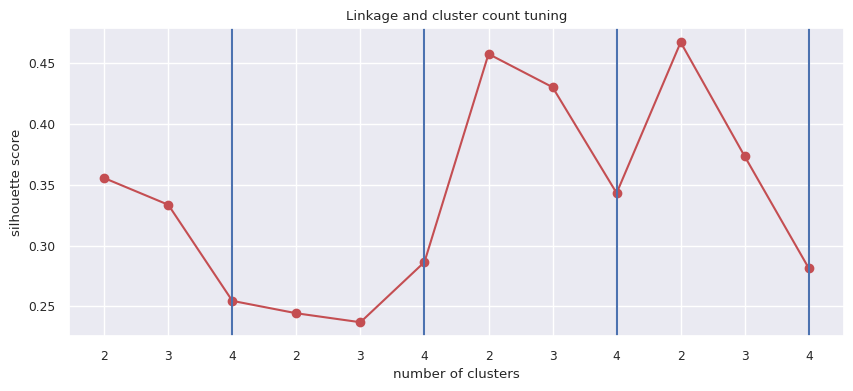

In [37]:
best_params = param_comb[np.argmax(scores)]
display(best_params)

plt.figure(figsize=(10, 4))
plt.title('Linkage and cluster count tuning')
plt.plot(scores, 'ro-')
plt.xlabel('number of clusters')
plt.ylabel('silhouette score')


plt.xticks(np.arange(12), [2, 3, 4] * 4)
for y in np.arange(2, 12, 3):
    plt.axvline(y, 0, 1, color='b')

plt.show()

Nejlépe si vedli metody `average` a `single`. Naopak `ward` a `complete` si vedly hůř.

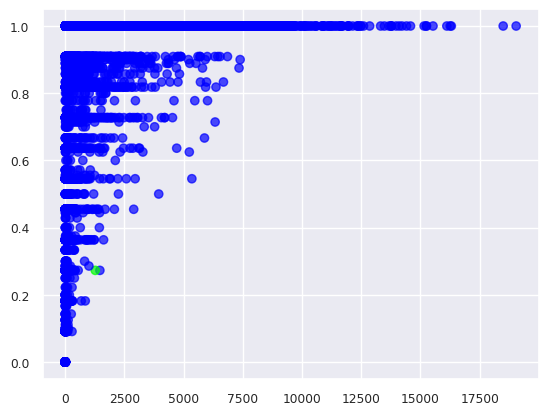

Silhouette score: 0.87379
Cophenet coef: 0.87182


In [38]:
from scipy.cluster.hierarchy import cophenet
from scipy.spatial.distance import pdist

opt_agg = AgglomerativeClustering(**best_params, compute_distances=True)
opt_agg.fit(X)


plt.scatter(X[:,0], X[:,1], c=opt_agg.labels_, cmap="brg", alpha=0.7)
plt.show()

pdistances = pdist(X, metric="euclidean")
cophenet_coef = np.corrcoef(pdistances, cophenet(Z_single))[0,1]

print('Silhouette score:', round(silhouette_score(X, opt_agg.labels_), 5))
print('Cophenet coef:', round(cophenet_coef, 5))

Můžeme pozorovat, že tak dobrého skóre model dosahuje z důvodu rozdělení na dva shluky, kde je jeden kompletně zanedbatelný.

Proto se opět pokusím zobrazit model s metodou linkování `ward`.

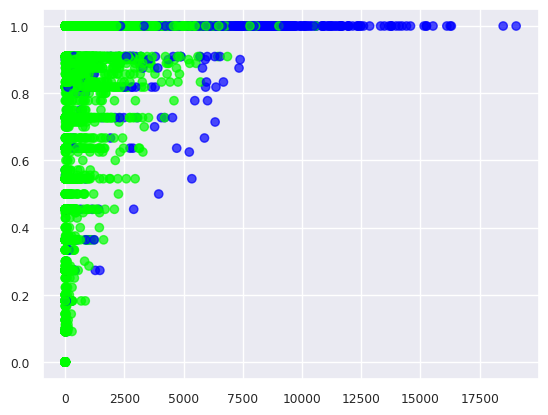

Silhouette score: 0.51837
Cophenet coef: 0.58867


In [39]:
from scipy.cluster.hierarchy import cophenet
from scipy.spatial.distance import pdist

opt_agg = AgglomerativeClustering(n_clusters=2, linkage='ward', compute_distances=True)
opt_agg.fit(X)

plt.scatter(X[:,0], X[:,1], c=opt_agg.labels_, cmap="brg", alpha=0.7)
plt.show()

pdistances = pdist(X, metric="euclidean")
cophenet_coef = np.corrcoef(pdistances, cophenet(Z_ward))[0,1]

print('Silhouette score:', round(silhouette_score(X, opt_agg.labels_), 5))
print('Cophenet coef:', round(cophenet_coef, 5))

při použití `ward` a 2 shluků už se dostáváme na lepší rozdělení.

### DBSCAN
DBSCAN je model, který shlukuje podle hustoty. Jeho hlavním parametrem je *epsilon*.

Tento parametr budu ladit pomocí parameterGrid.

In [40]:
from sklearn.cluster import DBSCAN

param_comb = ParameterGrid({
    'eps' : np.arange(2800, 3200, 50),
    'n_jobs' : [-1]
})

scores, cluster_cnt, noise_cnt = [], [], []

for params in param_comb:
    dbscan = DBSCAN(**params).fit(X)

    lab = dbscan.labels_
    print(np.unique(lab))

    scores.append(silhouette_score(X, lab))
    cluster_cnt.append(np.unique(lab).shape[0])
    noise_cnt.append(lab[lab == -1].shape[0])

[-1  0  1  2  3  4]
[-1  0  1  2  3  4]
[-1  0  1  2  3  4]
[-1  0  1  2  3  4]
[-1  0  1  2  3]
[-1  0  1  2  3]
[-1  0  1  2  3]
[-1  0  1  2  3]


#### Optimální model
Opět natrénuji DBSCAN s optimálním paremetrem podle silhouette score a vykreslím průběh optimalizace a další užitečné vizualizace.

{'n_jobs': -1, 'eps': 3000}

Silhouette score: 0.62111
Number of clusters: 5
Clustered values count: 8639
Noise values count: 311


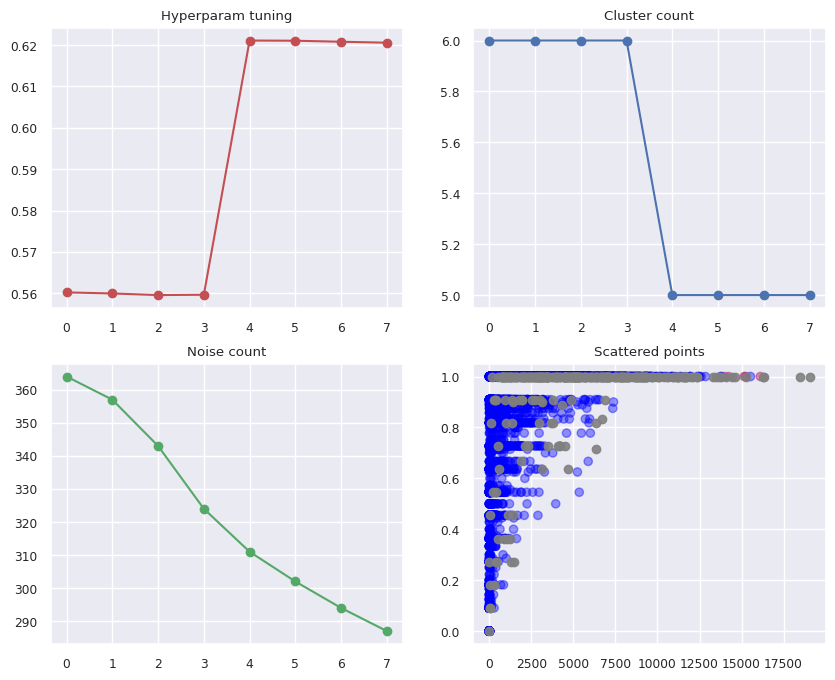

In [41]:
best_params = param_comb[np.argmax(scores)]
display(best_params)

# train with best params based on silhouette score
opt_dbscan = DBSCAN(**best_params).fit(X)
lab = opt_dbscan.labels_

# print basic info
print('Silhouette score:', round(silhouette_score(X, opt_dbscan.labels_), 5))
print('Number of clusters:', np.unique(lab).shape[0])
print('Clustered values count:', lab[lab >= 0].shape[0])
print('Noise values count:', lab[lab < 0].shape[0])

fig, ax = plt.subplots(2, 2, figsize=(10, 8))

# plot hyperparam development
ax[0,0].set_title('Hyperparam tuning')
ax[0,0].plot(scores,'ro-')

# plot cluster developement
ax[0,1].set_title('Cluster count')
ax[0,1].plot(cluster_cnt,'bo-')

# plot noise developement
ax[1,0].set_title('Noise count')
ax[1,0].plot(noise_cnt,'go-')

# plot cluster dependent points and noise
ax[1,1].set_title('Scattered points')
ax[1,1].scatter(X[lab > -1,0], X[lab > -1,1], c=lab[lab > -1], cmap='brg', alpha=0.4)
ax[1,1].scatter(X[lab < -0,0], X[lab < 0,1], c='gray', alpha=0.9)
fig.show()

Dle výsledných grafů můžeme vidět, že model nám podle nejlepšího silhouette score rozdělil množinu na 5 shluků (včetně šumu).

## Evaluace
Na základě modelů `kMeans` a `AgglomerativeClustering` jsem dospěl k názoru, že použiju 2 shluky. Vytvořím tedy kopii původního zpracovaného datasetu a každou hodnotu přiřadím ke svému příslušnému shluku.

Naopak `DBSCAN` vyhodnotil jako optimum 5 shluků z toho 1 jako šum. Budu se mu tedy věnovat samostatně.

Přidám do původních dat záznam o přiřazeném shluku.

In [57]:
data_assigned = data.copy()

data_assigned['CLUSTER_KMEANS'] = opt_kmeans_two.labels_
data_assigned['CLUSTER_AGG'] = opt_agg.labels_
data_assigned['CLUSTER_DBSCAN'] = opt_dbscan.labels_


### Rozdělení podle nákupů
Jako první metriku rozdělení na 2 shluky si zobrazím `PURCHASES` a `ONEOFF_PURCHASES`.


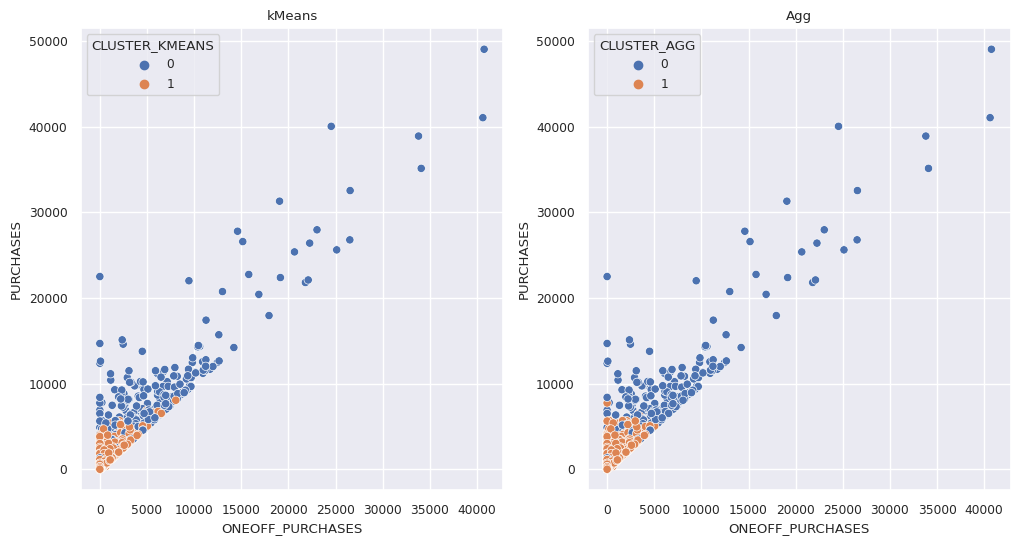

In [54]:
fig, ax = plt.subplots(1, 2, figsize=(12, 6))

ax[0].set_title('kMeans')
sns.scatterplot(ax=ax[0], data=data_assigned,
    x='ONEOFF_PURCHASES', y='PURCHASES', hue='CLUSTER_KMEANS')

ax[1].set_title('Agg')
sns.scatterplot(ax=ax[1], data=data_assigned, 
    x='ONEOFF_PURCHASES', y='PURCHASES', hue='CLUSTER_AGG')

plt.show()


Můžeme pozorovat, že oba modely nám rozdělují data na osoby co méně nakupují a co nakupují více.

### Rozdělení podle četnosti nákupu
Podívám se na rozdělení četnosti nákupů podle částky na účtu.

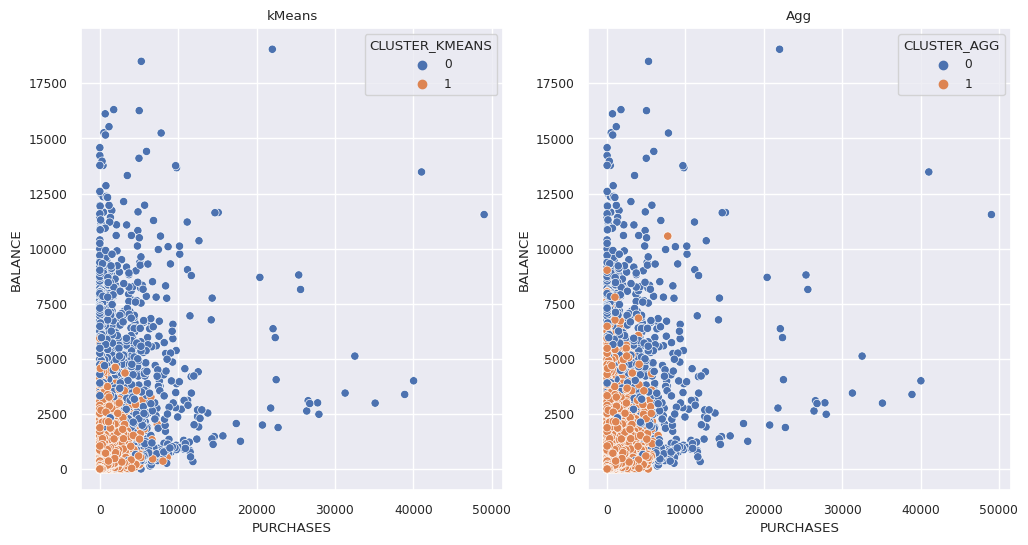

In [55]:
fig, ax = plt.subplots(1, 2, figsize=(12, 6))

ax[0].set_title('kMeans')
sns.scatterplot(ax=ax[0], data=data_assigned,
    x='PURCHASES', y='BALANCE', hue='CLUSTER_KMEANS')

ax[1].set_title('Agg')
sns.scatterplot(ax=ax[1], data=data_assigned, 
    x='PURCHASES', y='BALANCE', hue='CLUSTER_AGG')

plt.show()

Zde se uživatelé rozdělili na shluky ve kterých jedna skupina utratila méně pokud má na účtu míň peněz. Druhá skupina naopak utratila víc peněz.

### Platby v závislosti na limitu karty
Ještě se podívám jak je limit platby ovlivňován platbami uživatelů.

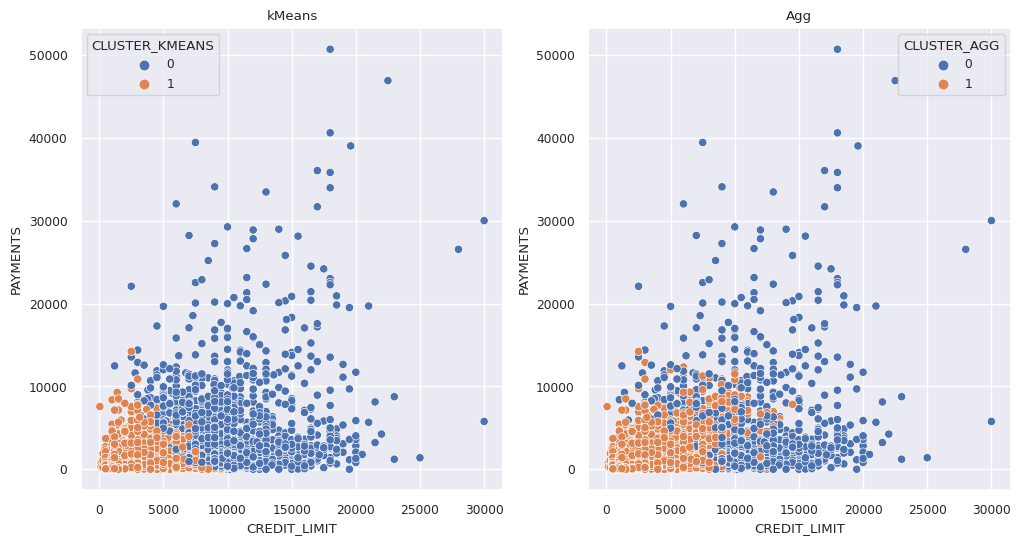

In [56]:
fig, ax = plt.subplots(1, 2, figsize=(12, 6))

ax[0].set_title('kMeans')
sns.scatterplot(ax=ax[0], data=data_assigned,
    x='CREDIT_LIMIT', y='PAYMENTS', hue='CLUSTER_KMEANS')

ax[1].set_title('Agg')
sns.scatterplot(ax=ax[1], data=data_assigned, 
    x='CREDIT_LIMIT', y='PAYMENTS', hue='CLUSTER_AGG')

plt.show()


Zde je jednoznačně množina rozdělena podle trendu: víc plateb = větší limit.

### DBSCAN - Rozdělení podle nákupů
Zde se ještě podívám na shluky vytvořené pomocí modelu DBSCAN.

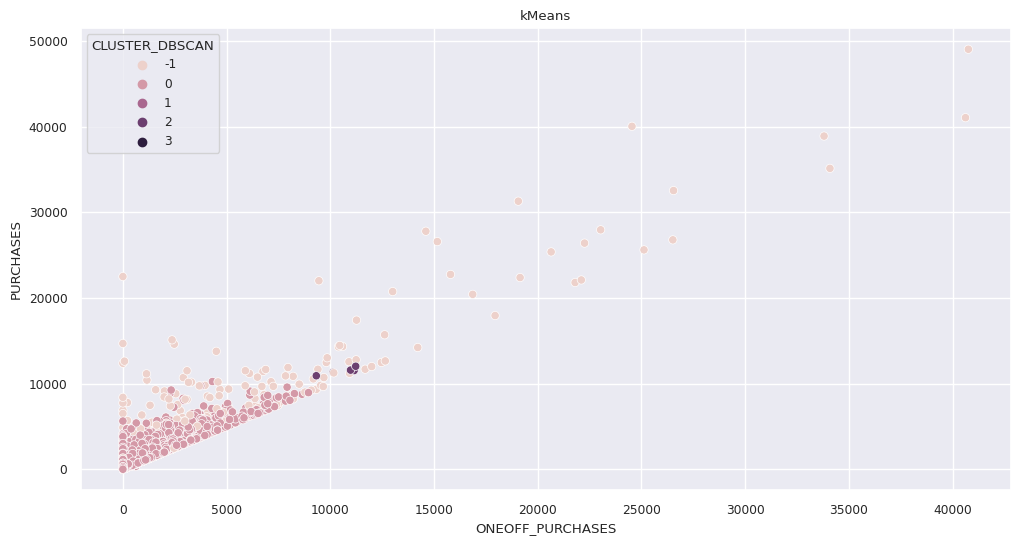

In [63]:
fig, ax = plt.subplots(figsize=(12, 6))

ax.set_title('kMeans')
sns.scatterplot(ax=ax, data=data_assigned,
    x='ONEOFF_PURCHASES', y='PURCHASES', hue='CLUSTER_DBSCAN')

plt.show()

Můžeme vidět, že DBSCAN nám rozdělil množinu na uživatele s málo nákupy a dále na pravděpodobně aktivní uživatele. Zbytek byl označen jako šum. 